**Team Number : 27**

Siju Niyati Samji 23110312 <br>
Makkena Lakshmi Manasa 23110193

**Download the data**

In [ ]:
!curl -O https://s3.amazonaws.com/tripdata/202412-citibike-tripdata.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  430M  100  430M    0     0  90.4M      0  0:00:04  0:00:04 --:--:-- 92.7M


In [ ]:
#unzipping the file
!unzip 202412-citibike-tripdata.zip

Archive:  202412-citibike-tripdata.zip
 extracting: 202412-citibike-tripdata_1.csv  
 extracting: 202412-citibike-tripdata_3.csv  
 extracting: 202412-citibike-tripdata_2.csv  


In [ ]:
#converting the csv file into pandas dataframe
import pandas as pd

data_file = "202412-citibike-tripdata_1.csv"
df = pd.read_csv(data_file)

df

<ipython-input-3-bdf41ce995e8>:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B44E5B10AEE58AD0,classic_bike,2024-12-14 10:58:18.153,2024-12-14 11:11:11.308,Frederick Douglass Blvd & W 145 St,7954.12,E 138 St & 5 Ave,7809.13,40.823061,-73.941928,40.814490,-73.936153,member
1,BC252DC6A6011556,electric_bike,2024-12-12 14:46:12.473,2024-12-12 16:45:37.777,Madison Ave & E 99 St,7443.01,NaN,NaN,40.789485,-73.952429,40.780000,-73.960000,member
2,6FBE55EF6FE8736D,electric_bike,2024-12-11 07:55:18.770,2024-12-11 08:02:23.460,Columbia St & Kane St,4422.05,NaN,NaN,40.687632,-74.001626,40.690000,-74.000000,member
3,908890DE7FDCF9FE,electric_bike,2024-12-09 22:51:11.668,2024-12-09 22:57:43.495,E 13 St & 2 Ave,5820.08,E 10 St & 2 Ave,5746.02,40.731539,-73.985302,40.729708,-73.986598,member
4,D5D366379A4DC0A8,classic_bike,2024-12-10 18:48:40.063,2024-12-10 19:10:32.264,11 Ave & W 41 St,6726.01,E 25 St & 1 Ave,6004.07,40.760301,-73.998842,40.738177,-73.977387,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,4D7A0F3A9B538327,classic_bike,2024-12-06 18:43:51.866,2024-12-06 18:50:29.033,5 Ave & E 30 St,6248.08,10 Ave & W 28 St,6459.04,40.745985,-73.986295,40.750664,-74.001768,member
999996,93C022D486F87ABC,classic_bike,2024-12-10 10:34:58.071,2024-12-10 10:51:49.151,Lafayette St & Grand St,5422.09,10 Ave & W 28 St,6459.04,40.720280,-73.998790,40.750664,-74.001768,member
999997,20A11C486859F19B,electric_bike,2024-12-03 14:02:29.375,2024-12-03 14:07:51.452,Lenox Ave & W 117 St,7655.22,W 110 St & Amsterdam Ave,7646.04,40.802557,-73.949078,40.802692,-73.962950,member
999998,4D27B49621858BF9,electric_bike,2024-12-05 07:03:08.210,2024-12-05 07:06:03.572,Watts St & Greenwich St,5578.02,West St & Chambers St,5329.03,40.724055,-74.009660,40.717548,-74.013221,casual


In [ ]:
#installing pandera library
!pip install pandera

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.8 MB/s eta 0:00:00


In [ ]:
#showing the version of pandera
!pip show pandera

Name: pandera
Version: 0.22.1
Summary: A light-weight and flexible data validation and testing tool for statistical data objects.
Home-page: https://github.com/pandera-dev/pandera
Author: Niels Bantilan
Author-email: niels.bantilan@gmail.com
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, packaging, pandas, pydantic, typeguard, typing_inspect
Required-by: 


**Question 1**

**Question-1 a**

In [ ]:
#importing all the libraries
import pandas as pd
import pandera as pa
from pandera import Column, Check, DataFrameSchema
import json

# Convert datetime columns into string for datatype validation
df["started_at"] = pd.to_datetime(df["started_at"]).astype(str)
df["ended_at"] = pd.to_datetime(df["ended_at"]).astype(str)

#Define the Schema
schema = DataFrameSchema(
    {
        "ride_id": Column(str),  #ride_id should be a string
        "rideable_type": Column(str), #rideable_type should be string
        "started_at": Column(str),  #started_at should be string
        "ended_at": Column(str), #ended_at should be string
        "start_station_name": Column(str, nullable=True), #start_station_name should b string
        "start_station_id": Column(str, nullable=True), #start_station_id should be string
       "end_station_name": Column(str, nullable=True), #end_station_name should be string
        "end_station_id": Column(str, nullable=True), #end_station_id should be string
        "start_lat": Column(float, nullable=False), #start_lat should be float
        "start_lng": Column(float, nullable=False), #start_lng should be float
        "end_lat": Column(float, nullable=False), #end_lat should be float
        "end_lng": Column(float, nullable=False), #end_lng should be float
        "member_casual": Column(str, nullable=False), #member_casual should be string
    },

    index=pa.Index(int),  # Ensuring the index is integer-based
)

#Validate the Data
try:
    validated_df = schema.validate(df)
    print("Data validation passed successfully!")
except pa.errors.SchemaError as e:
    print("Data validation failed!")
    print(e)

Data validation failed!
expected series 'start_station_id' to have type str:
failure cases:
        index failure_case
0      983040      6257.06
1      983041      6667.04
2      983042      6847.02
3      983043      3919.07
4      983044      3919.07
...       ...          ...
16949  999995      6248.08
16950  999996      5422.09
16951  999997      7655.22
16952  999998      5578.02
16953  999999      8277.03

[16954 rows x 2 columns]


**Question 1.b**

In [ ]:
import pandera as pa
import json

# Define the schema with the appropriate checks
schema = pa.DataFrameSchema(
    {
        "ride_id": pa.Column(str, nullable=False), #ride_id should not be null

        "rideable_type": pa.Column(str, checks=pa.Check.isin(["electric_bike", "classic_bike"]), nullable=False ),
        #should be either electric bike or classic bike and entry should not be null

        "started_at": pa.Column(str, nullable=False), #should not be null

        "ended_at": pa.Column(str, nullable=False), #should not be null

        "start_station_name": pa.Column(str, nullable=True), #can be null, because we could work with start_station_id if station_name is not there

        "start_station_id": pa.Column(str, nullable=True), #can be null, we could work with station_name insted of start_station_id

        "end_station_name": pa.Column(str, nullable=True), #can be null, we could work with end_station_name instead of end_station_id

        "end_station_id": pa.Column(str, nullable=True), #can be null, we could work with end_station_name if end_station_id is not there

        "start_lat": pa.Column(float,checks=pa.Check.in_range(-90, 90), nullable=False),
        #should be in range of -90 to 90 degree and can't be null

        "start_lng": pa.Column(float, checks=pa.Check.in_range(-180, 180), nullable=False),
        #should be in range of -180 to 180 degree and can't be null

        "end_lat": pa.Column(float,  checks=pa.Check.in_range(-90, 90), nullable=False),
        #should be in range of -90 to 90 degree and can't be null

        "end_lng": pa.Column(float, checks=pa.Check.in_range(-180, 180), nullable=False),
        #should be in range of -180 to 180 degree and can't be null

        "member_casual": pa.Column(str, checks=pa.Check.isin(["member", "casual"]), nullable=False)
         #should be either member or casual and entry should not be null
    },

    strict=True  # Ensures that all columns in the DataFrame are explicitly defined in the schema
)

# Validate the DataFrame
try:
    schema.validate(df, lazy=True)
except pa.errors.SchemaErrors as e:
    print(json.dumps(e.message, indent=2))


{
  "SCHEMA": {
    "WRONG_DATATYPE": [
      {
        "schema": null,
        "column": "start_station_id",
        "check": "dtype('str')",
        "error": "expected series 'start_station_id' to have type str:failure cases:        index failure_case0      983040      6257.061      983041      6667.042      983042      6847.023      983043      3919.074      983044      3919.07...       ...          ...16949  999995      6248.0816950  999996      5422.0916951  999997      7655.2216952  999998      5578.0216953  999999      8277.03[16954 rows x 2 columns]"
      },
      {
        "schema": null,
        "column": "end_station_id",
        "check": "dtype('str')",
        "error": "expected series 'end_station_id' to have type str:failure cases:         index failure_case0       262144      5553.031       262145      5838.092       262146      6123.023       262147      6046.024       262148      6046.02...        ...          ...145407  999995      6459.04145408  999996      6459.04

We are not considering null values for latitudes and longitudes.

**Question 1.c**


In [ ]:
import pandas as pd
import pandera as pa
from pandera.typing import DataFrame
from pandera import Check, Column

# Define the schema with a custom check for end time > start time
schema = pa.DataFrameSchema({
    "ride_id": pa.Column(str, nullable=False),
    "rideable_type": pa.Column(
        str,
        checks=Check.isin(["electric_bike", "classic_bike"]),
        nullable=False
    ),
    "started_at": pa.Column(str, nullable=False),
    "ended_at": pa.Column(str, nullable=False),
    "start_station_name": pa.Column(str, nullable=True),
    "start_station_id": pa.Column(str, nullable=True),
    "end_station_name": pa.Column(str, nullable=True),
    "end_station_id": pa.Column(str, nullable=True),
    "start_lat": pa.Column(float, checks=Check.in_range(-90, 90), nullable=False),
    "start_lng": pa.Column(float, checks=Check.in_range(-180, 180), nullable=False),
    "end_lat": pa.Column(float, checks=Check.in_range(-90, 90), nullable=False),
    "end_lng": pa.Column(float, checks=Check.in_range(-180, 180), nullable=False),
    "member_casual": pa.Column(
        str,
        checks=Check.isin(["member", "casual"]),
        nullable=False
    )
}, strict=True)

# Define a preprocessor to add a validation rule for start and end times
@pa.check_input(schema)
def validate_and_preprocess(dataframe: DataFrame):
    # Convert to datetime for comparison
    dataframe["started_at"] = pd.to_datetime(dataframe["started_at"])
    dataframe["ended_at"] = pd.to_datetime(dataframe["ended_at"])

    # Verify that ended_at occurs after started_at
    invalid_rows = dataframe[dataframe["ended_at"] <= dataframe["started_at"]]
    if not invalid_rows.empty:
        raise ValueError("Invalid data: 'ended_at' must be after 'started_at' for all rows.")

    return dataframe

# Apply the validation and preprocessing
try:
    validated_df = validate_and_preprocess(df)
    print("Validation passed!")
except Exception as e:
    print(f"Validation failed: {e}")


Validation failed: error in check_input decorator of function 'validate_and_preprocess': expected series 'start_station_id' to have type str:
failure cases:
        index failure_case
0      983040      6257.06
1      983041      6667.04
2      983042      6847.02
3      983043      3919.07
4      983044      3919.07
...       ...          ...
16949  999995      6248.08
16950  999996      5422.09
16951  999997      7655.22
16952  999998      5578.02
16953  999999      8277.03

[16954 rows x 2 columns]


The validation fails with `str` because the `start_station_id` column contains mixed types (e.g., floats). By changing it to `object`, Pandera allows any Python object, such as strings and floats, to pass validation, avoiding the type mismatch issue.

**Great Expectations Suite**

Installing the dataset

In [ ]:
!curl -O https://s3.amazonaws.com/tripdata/202412-citibike-tripdata.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  430M  100  430M    0     0  91.7M      0  0:00:04  0:00:04 --:--:-- 99.8M


In [ ]:
!unzip 202412-citibike-tripdata.zip

Archive:  202412-citibike-tripdata.zip
replace 202412-citibike-tripdata_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: 202412-citibike-tripdata_1.csv  
replace 202412-citibike-tripdata_3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: 202412-citibike-tripdata_3.csv  
replace 202412-citibike-tripdata_2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: 202412-citibike-tripdata_2.csv  


Loading the dataset

In [ ]:
import pandas as pd

data_file = "202412-citibike-tripdata_1.csv"
df = pd.read_csv(data_file)

<ipython-input-11-27f8237c919e>:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


In [ ]:
df.head(4)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B44E5B10AEE58AD0,classic_bike,2024-12-14 10:58:18.153,2024-12-14 11:11:11.308,Frederick Douglass Blvd & W 145 St,7954.12,E 138 St & 5 Ave,7809.13,40.823061,-73.941928,40.814490,-73.936153,member
1,BC252DC6A6011556,electric_bike,2024-12-12 14:46:12.473,2024-12-12 16:45:37.777,Madison Ave & E 99 St,7443.01,NaN,NaN,40.789485,-73.952429,40.780000,-73.960000,member
2,6FBE55EF6FE8736D,electric_bike,2024-12-11 07:55:18.770,2024-12-11 08:02:23.460,Columbia St & Kane St,4422.05,NaN,NaN,40.687632,-74.001626,40.690000,-74.000000,member
3,908890DE7FDCF9FE,electric_bike,2024-12-09 22:51:11.668,2024-12-09 22:57:43.495,E 13 St & 2 Ave,5820.08,E 10 St & 2 Ave,5746.02,40.731539,-73.985302,40.729708,-73.986598,member


In [ ]:
# Convert 'started_at' to datetime
df["started_at"] = pd.to_datetime(df["started_at"], errors="coerce")
# Convert 'ended_at' to datetime
df["ended_at"] = pd.to_datetime(df["ended_at"], errors="coerce")

In [ ]:
!rm -rf gx
!pip install pandas
!pip install great_expectations -q

In [ ]:
import great_expectations as gx
from great_expectations.data_context.types.base import DataContextConfig
from great_expectations.checkpoint import CheckpointResult

import pandas as pd

Creating a datacontext

In [ ]:
context = gx.get_context(mode="file")

print(type(context).__name__)

FileDataContext


Setting up a data source to allow greatexpectations to validate the data and
creating a data asset to group validation results.

In [ ]:

data_source_name = "my_data_source"
data_source = context.data_sources.add_pandas(name=data_source_name)


data_asset_name = "my_dataframe_data_asset"
data_asset = data_source.add_dataframe_asset(name=data_asset_name)

Creating a bath which further groups the validation results

In [ ]:
batch_definition = data_asset.add_batch_definition_whole_dataframe("batch definition")
batch_parameters = {"dataframe": df}
batch = batch_definition.get_batch(batch_parameters)
print(batch.head(3))

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

            ride_id  rideable_type              started_at  \
0  B44E5B10AEE58AD0   classic_bike 2024-12-14 11:11:11.308   
1  BC252DC6A6011556  electric_bike 2024-12-12 16:45:37.777   
2  6FBE55EF6FE8736D  electric_bike 2024-12-11 08:02:23.460   

                 ended_at                  start_station_name  \
0 2024-12-14 11:11:11.308  Frederick Douglass Blvd & W 145 St   
1 2024-12-12 16:45:37.777               Madison Ave & E 99 St   
2 2024-12-11 08:02:23.460               Columbia St & Kane St   

  start_station_id  end_station_name end_station_id  start_lat  start_lng  \
0          7954.12  E 138 St & 5 Ave        7809.13  40.823061 -73.941928   
1          7443.01               NaN            NaN  40.789485 -73.952429   
2          4422.05               NaN            NaN  40.687632 -74.001626   

    end_lat    end_lng member_casual  
0  40.81449 -73.936153        member  
1  40.78000 -73.960000        member  
2  40.69000 -74.000000        member  


Creating a Exceptional Suite

In [ ]:
suite_name = "citibike_tripdata"
suite = gx.ExpectationSuite(name=suite_name)

In [ ]:
suite = context.suites.add(suite)

Creating Expectations and adding them to the suite

In [ ]:
expectation_ride_id = gx.expectations.ExpectColumnValuesToBeOfType(
    column="ride_id", type_="str"
)

# Validate `rideable_type` to be in a set of allowed values
expectation_rideable_type = gx.expectations.ExpectColumnValuesToBeInSet(
    column="rideable_type",
    value_set=["electric_bike", "classic_bike", "docked_bike"]
)

# Validate `started_at` as datetime
expectation_started_at = gx.expectations.ExpectColumnValuesToBeOfType(
    column="started_at", type_="datetime64[ns]"
)

# Validate `ended_at` as datetime
expectation_ended_at = gx.expectations.ExpectColumnValuesToBeOfType(
    column="ended_at", type_="datetime64[ns]"
)

# Validate `start_station_name` as a string
expectation_start_station_name = gx.expectations.ExpectColumnValuesToBeOfType(
    column="start_station_name", type_="str"
)

# Validate `start_station_id` as a string
expectation_start_station_id = gx.expectations.ExpectColumnValuesToBeOfType(
    column="start_station_id", type_="str"
)

# Validate `end_station_name` as a string
expectation_end_station_name = gx.expectations.ExpectColumnValuesToBeOfType(
    column="end_station_name", type_="str"
)

# Validate `end_station_id` as a string
expectation_end_station_id = gx.expectations.ExpectColumnValuesToBeOfType(
    column="end_station_id", type_="str"
)

# Validate `start_lat` as float
expectation_start_lat = gx.expectations.ExpectColumnValuesToBeOfType(
    column="start_lat", type_="float64"
)

# Validate `start_lng` as float
expectation_start_lng = gx.expectations.ExpectColumnValuesToBeOfType(
    column="start_lng", type_="float64"
)

# Validate `end_lat` as float
expectation_end_lat = gx.expectations.ExpectColumnValuesToBeOfType(
    column="end_lat", type_="float64"
)

# Validate `end_lng` as float
expectation_end_lng = gx.expectations.ExpectColumnValuesToBeOfType(
    column="end_lng", type_="float64"
)

# Validate `member_casual` to be in a set of allowed values
expectation_member_casual = gx.expectations.ExpectColumnValuesToBeInSet(
    column="member_casual",
    value_set=["member", "casual"]
)

# Adding expectations to the suite
suite.add_expectation(expectation_ride_id)
suite.add_expectation(expectation_rideable_type)
suite.add_expectation(expectation_started_at)
suite.add_expectation(expectation_ended_at)
suite.add_expectation(expectation_start_station_name)
suite.add_expectation(expectation_start_station_id)
suite.add_expectation(expectation_end_station_name)
suite.add_expectation(expectation_end_station_id)
suite.add_expectation(expectation_start_lat)
suite.add_expectation(expectation_start_lng)
suite.add_expectation(expectation_end_lat)
suite.add_expectation(expectation_end_lng)
suite.add_expectation(expectation_member_casual)




ExpectColumnValuesToBeInSet(id='7a446238-5c39-41ad-b5c9-dd75c9590fcc', meta=None, notes=None, result_format=<ResultFormat.BASIC: 'BASIC'>, description=None, catch_exceptions=True, rendered_content=None, windows=None, batch_id=None, column='member_casual', mostly=1, row_condition=None, condition_parser=None, value_set=['member', 'casual'])

Creating a validation definition

In [ ]:
definition_name = "my_validation_definition"
validation_definition = gx.ValidationDefinition(
    data=batch_definition, suite=suite, name=definition_name
)

Saving the validation defintion to the context

In [ ]:
validation_definition = context.validation_definitions.add(validation_definition)

Running the validation definition

In [ ]:
validation_definition_name = "my_validation_definition"
validation_definition = context.validation_definitions.get(validation_definition_name)

validation_results = validation_definition.run(batch_parameters=batch_parameters)
print(validation_results)

Calculating Metrics:   0%|          | 0/52 [00:00<?, ?it/s]

{
  "success": false,
  "results": [
    {
      "success": true,
      "expectation_config": {
        "type": "expect_column_values_to_be_of_type",
        "kwargs": {
          "batch_id": "my_data_source-my_dataframe_data_asset",
          "column": "ride_id",
          "type_": "str"
        },
        "meta": {},
        "id": "db50ead1-e4ec-4e0b-88e9-b9738f78dc01"
      },
      "result": {
        "element_count": 1000000,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "partial_unexpected_list": [],
        "missing_count": 0,
        "missing_percent": 0.0,
        "unexpected_percent_total": 0.0,
        "unexpected_percent_nonmissing": 0.0,
        "partial_unexpected_counts": [],
        "partial_unexpected_index_list": []
      },
      "meta": {},
      "exception_info": {
        "raised_exception": false,
        "exception_traceback": null,
        "exception_message": null
      }
    },
    {
      "success": true,
      "expectation_config

Question 2 Task 2

Email Action

In [ ]:
from great_expectations.checkpoint import (
    EmailAction
)

In [ ]:
context = gx.get_context()

In [ ]:
validation_definitions = [
    context.validation_definitions.get("my_validation_definition")
]

In [ ]:
email_action =[EmailAction(
    name="send_email_on_failure",
    smtp_address='smtp.gmail.com',
    smtp_port=587,
    receiver_emails="23110312@iitgn.ac.in",
    sender_login="23110193@iitgn.ac.in",
    #sender_password="xmfo fxlf slox pumb",
    sender_password="cmsl uizu xeot fvyh",
    use_tls=True,
    notify_on="all",
)]

In [ ]:
checkpoint_name = "my_checkpoint"
checkpoint = gx.Checkpoint(
    name=checkpoint_name,
    validation_definitions=validation_definitions,
    actions=email_action,
    result_format={"result_format": "COMPLETE"},
)

# Save the Checkpoint to the Data Context
context.checkpoints.add(checkpoint)

# Retrieve the Checkpoint later
checkpoint_name = "my_checkpoint"
checkpoint = context.checkpoints.get(checkpoint_name)

In [ ]:
validation_results = checkpoint.run(
    batch_parameters=batch_parameters, expectation_parameters=suite
)

Calculating Metrics:   0%|          | 0/52 [00:00<?, ?it/s]

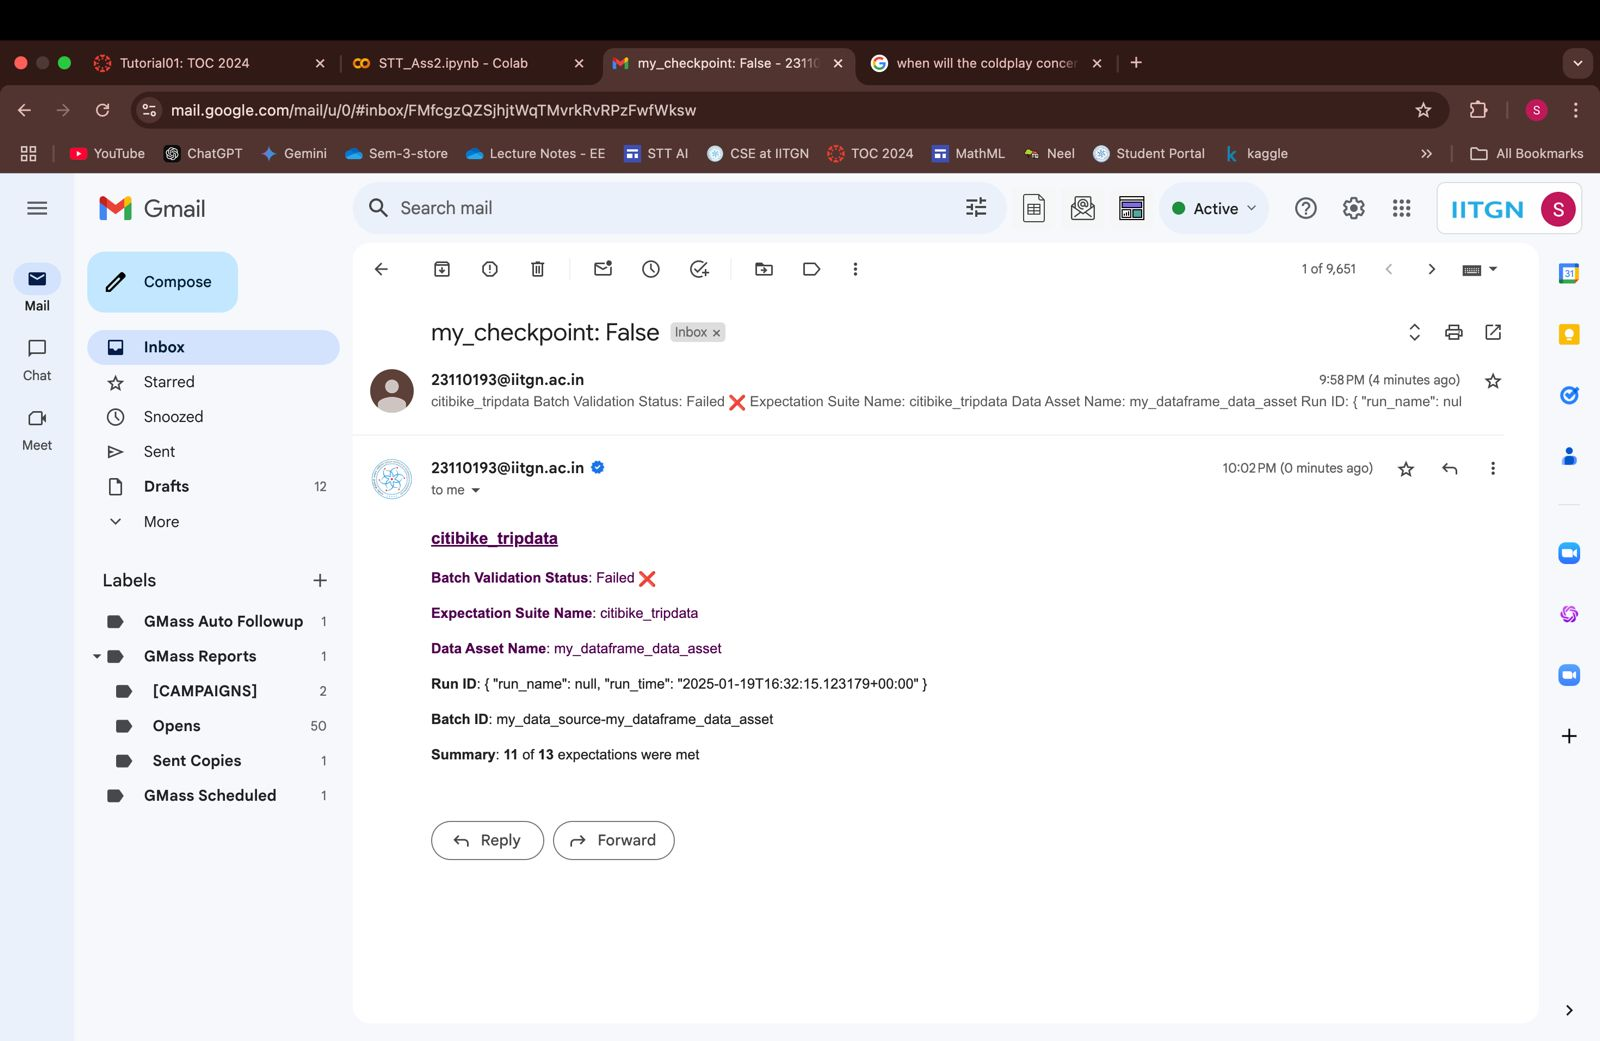

The validation fails with `str` because the `start_station_id` column contains mixed types (e.g., floats).